# 파이썬으로 유전자 알고리즘 (Genetic Algorithm) 학습

# 1. 관련된 핵심 내용 요약

## 1.1. 기초 개념들

- 개요: 유전 알고리즘(Genetic Algorithm)은 생물의 진화과정인 자연선택(Natural Selection)과 유전법칙을 모방한 확률적 탐색기법이다. 즉, 유전 알고리즘은 진화론에 기반한 알고리즘으로, 자연계에서 생물의 진화 과정을 모방하여 최적해를 지속적으로 찾아내는 것이 주요 생각이다.
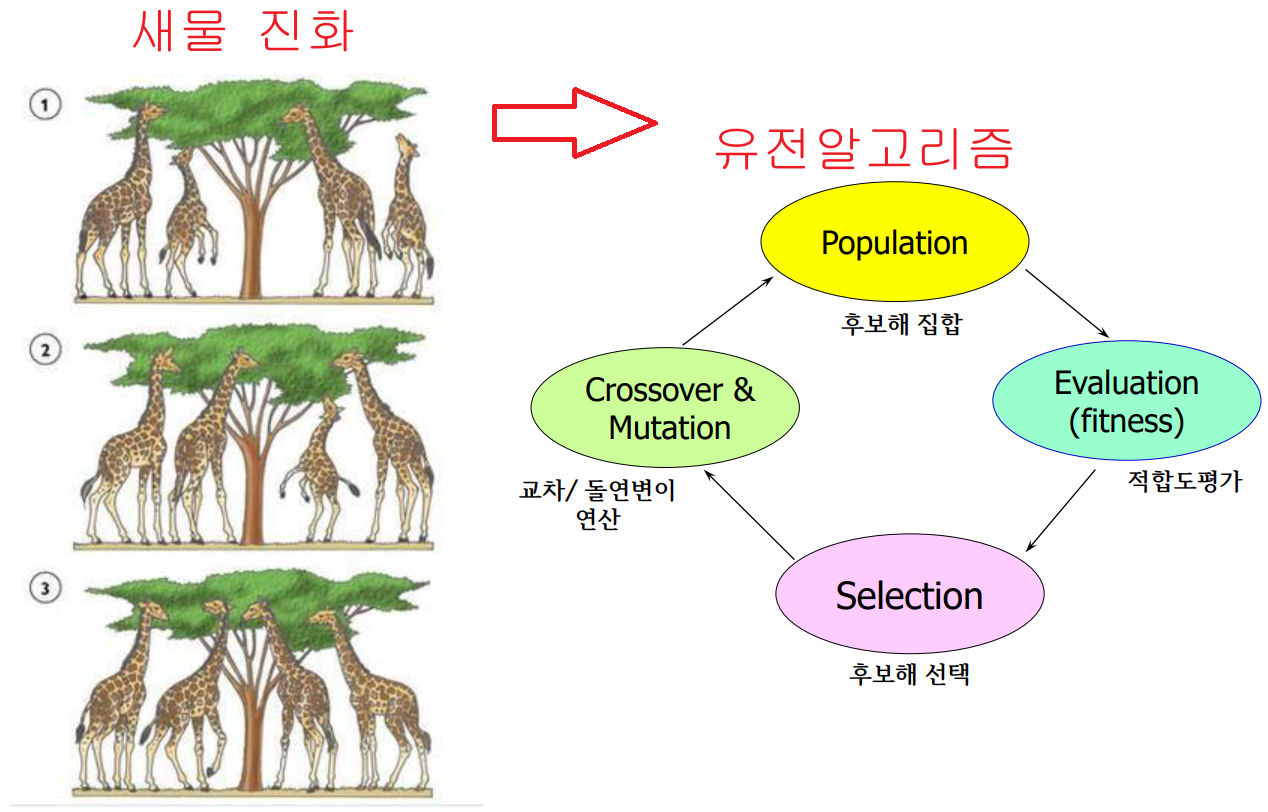

- 전통적인 방법과 차이점: 전통적인 방법은 문제 해결 방법을 명확하게 지정하는 알고리즘인 반면 유전자 알고리즘은 유전과 자연 선택의 원리에 따라 최적화 문제를 해결하는 알고리즘이라는 점이다. 전통적인 방법은 주어진 문제를 해결하기 위한 단계별 접근 방식을 제공하는 반면 유전 알고리즘은 생물학적 진화 과정을 시뮬레이션하여 최적의 솔루션을 찾는다. 따라서 유전자 알고리즘은 전역 최적화 능력과 적응성이 더 우수하지만 복잡성과 계산 비용이 더 높다.
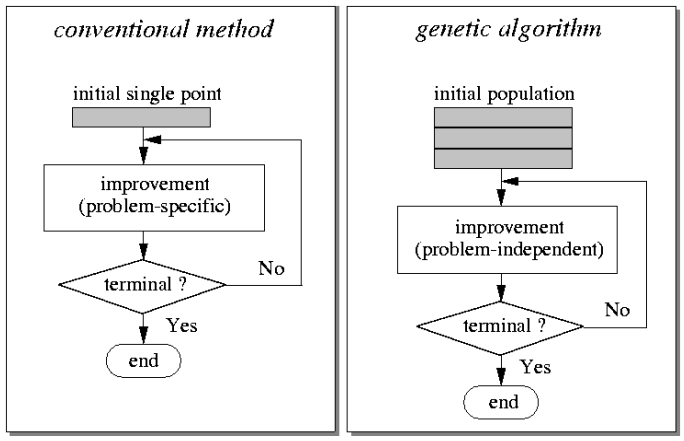

- 주요 특징: 구조적 객체에 대해 직접 연산하고 파생 및 함수 연속성에 대한 제한이 없으며 내재된 암묵적 병렬성과 더 나은 전역 최적화 능력을 가지고 있으며 확률적 최적화 방법을 채택하고 명확한 규칙이 필요하지 않으며 자동으로 얻을 수 있다. 최적화된 검색 공간을 안내하고 검색 방향을 적응적으로 조정함다. 즉 Random Search + Directed Search이다.
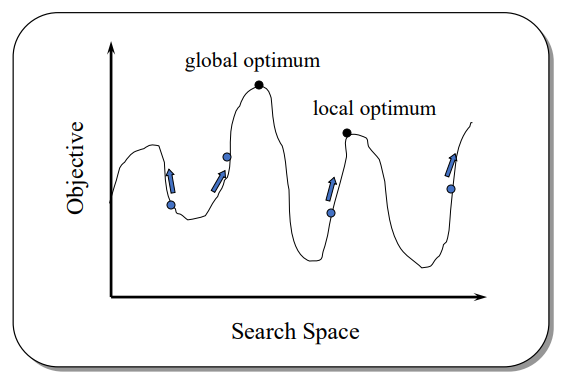
- 적용 범위: 전통적 방법으로 (결정론적인 (Deterministic) 방법으로) 좋은 해를 잘 구하지 못하는 문제에 대해서 대략적인 해결책을 찾을 수 있다. 하지만 결정론적 알고리즘 (Deterministic Algorithm) 으로 쉽게 풀리는 문제나 크기가 너무 작은 문제들이 소용없다. 

- 관련 용어 (생물학적과 비교): 
> - 염색체 (Chromosome): 생물학적으로는 유전 물질을 담고 있는 하나의 집합을의미하며, 유전 알고리즘에는 하나의 해 (Solution)를 표현된다. 즉, 어떠한 문제의 해를 염색체로 인코딩 (Encoding)하는 것이다.
> - 해집단 (Population): 정해진 수의 염색체 집단을 운영이다. 보통 복수개의 해를 지정한다.
> - 유전자 (Gene): 염색체를 구성하는 요소로써, 하나의 유전 정보를 나타낸다. 즉, 어떠한 염색체가 [A B C]라면, 이 염색체에는 각각 A, B 그리고 C의 값을 갖는 3개의 gene이 존재한다.
> - 자손 (Offspring): 특정 시간 t에 존재했던 염색체들로부터 생성된 염색체를 t에 존재했던 염색체들의 자손이라고 하고, 자손은 이전 세대와 비슷한 유전 정보를 가지고 있다.
> - 적합도 (Fitness): 어떠한 염색체가 갖고 있는 고유값으로써, 해당 문제에 대해 염색체가 표현하는 해가 얼마나 적합한지를 나타낸다.
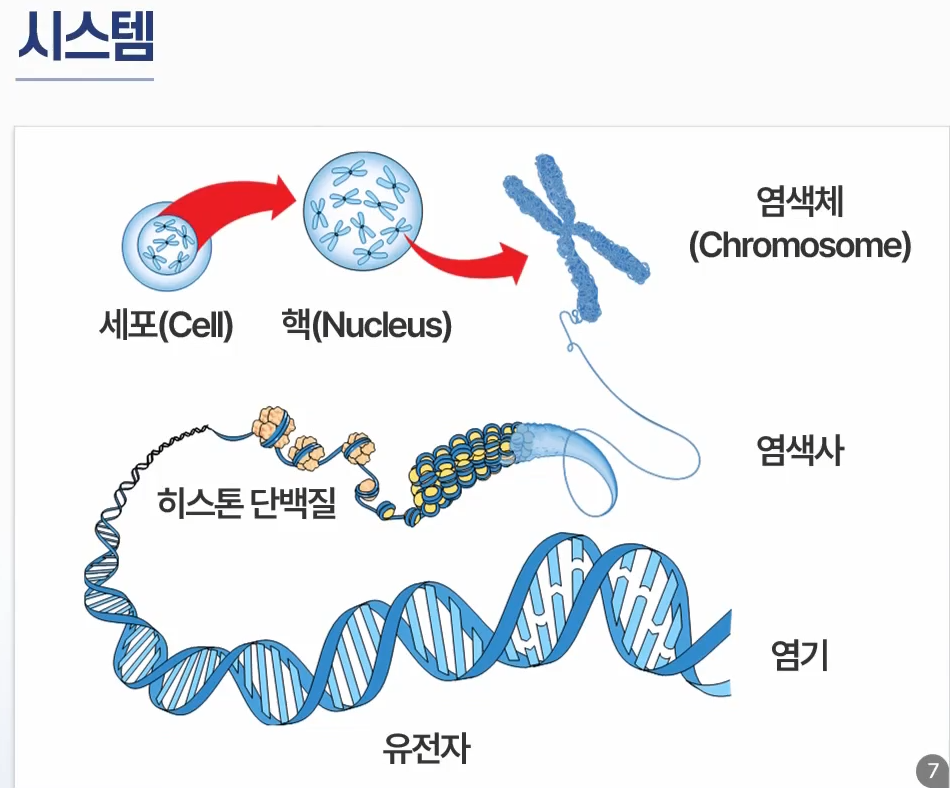

- > 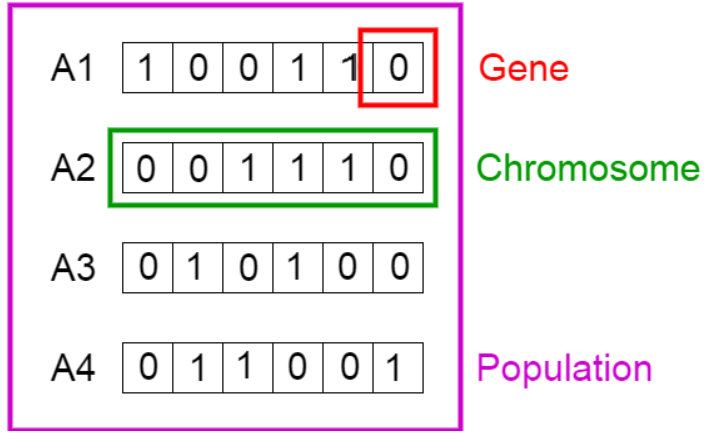

- 관련 연산:
> - 초기 염색체를 생성하는 연산 (이진수 표현 : k-진수 표현)
> - 적합도(Fitness)를 계산하는 연산
> - 선택 (Selection) 연산
> - 교차 (Crossover) 연산
> - 돌연변이 (Mutation) 연산
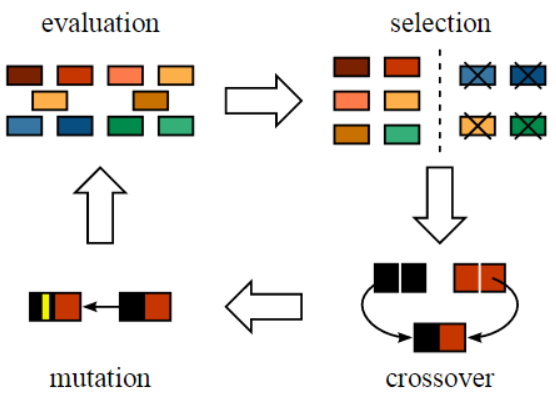

- 연산 서클: 
> 모집단은 매 세대마다 일정수의 개체를 유지한다. 매 세대에서 각 개체의 적응도(Fitness)를 평가하여 이에 따라 다음 세대에 생존할 개체들을 확률적으로 선별(Selection)한다. 선별된 개체들 중 일부의 개체들이 임의로 짝을 지어 교배하여 자손을 생성한다. 이때 교차(Crossover)에 의해 부모의 유전자가 자손에게상속되고, 돌연변이(Mutation)가 일어날 수 있다. 자손은 부모로부터 좋은 유전형질을 상속받는다고 가정할 때, 다음 세대의 잠재해들은 평균적으로 전 세대보다 더 좋아진다고 볼 수 있다. 이러한 진화과정은 종료조건을 만족할 때까지 반복한다. 
> 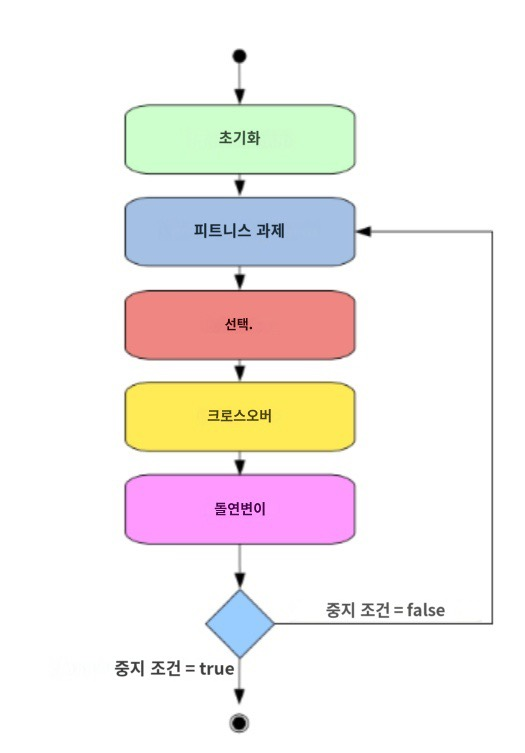

# 2. 'Python 을 사용한 유전 알고리즘 구현' 논문 따라 코드 실행 
> - 본 논문에서는 도시 개수가 9 개인 외판원 문제 위주로 유전 알고리즘 구현에 대해 설명한다. 각 개체는 방문하는 도시를 순서대로 나열한 리스트이다.
> - 이것은 역사상 유명한 TSP(Traveling Salesman Problem) 문제이다. 이는 여행상인이 n개의 도시를 방문하고자 하고, 각 도시 간의 거리를 알고 있음을 의미하며, 여행상인은 각 도시를 차례로 방문할 경로를 선택하고 최종적으로 출발점으로 돌아가 전체 경로를 최단 거리로 만들어야 한다.
> - TSP 문제는 NP-hard 문제에 속하는 고전적인 조합 최적화 문제이다. 계산적으로 어려운 문제이지만 수많은 휴리스틱 알고리즘과 정밀한 방법이 개발되어 수만 건의 인스턴스를 풀 수 있으며 오차는 1% 이내로 제어할 수 있다.
> - 이 예제에서는 파이썬 기반 유전자 알고리즘이 사용된다.

## 2.1. 초기 모집단 생성
> 초기 모집단을 생성하기 위해서는 우선 가능해(Feasible Solution)를 하나 만든 후, 이를 무작위적으로 변형시키면 된다.

In [16]:
import random, copy

sample_chrm = range(1,10) # 하나의 실행 가능한 솔루션
init_population = [] # 무작위 리스트를 저장할 빈 리스트
random.seed(42) 
population_size = 5 # 여기서는 5 개의 개체를 생성
for i in range(population_size): 
    new_chrm = copy.copy(list(sample_chrm)) # 무작위 리스트 생성
    random.shuffle(new_chrm) 
    init_population.append(new_chrm) # 모집단 리스트에 추가

In [17]:
list(sample_chrm)

[1, 2, 3, 4, 5, 6, 7, 8, 9]

In [18]:
for li in init_population:
    print(list(li))

[4, 7, 8, 5, 9, 3, 6, 1, 2]
[8, 3, 6, 7, 1, 4, 5, 2, 9]
[3, 6, 8, 9, 7, 2, 5, 1, 4]
[9, 8, 6, 3, 4, 2, 7, 1, 5]
[5, 3, 2, 8, 9, 7, 1, 6, 4]


## 2.2. 적응도 평가
> 적응도는 자연개체의 생존능력을 나타낸다. 최적화 문제에서 적응도는 목적 함수에 의해 측정된다.

In [19]:
# 외판원 문제에서 도시 간 이동 시 발생하는 비용이나 거리를 나타내는 Cost(Distance) Matrix 는 다음과 같은 방법으로 생성할 수 있다.

cost_matrix = [] 
cost_matrix.append([0,0,0,0,0,0,0,0,0,0]) 
cost_matrix.append([0,0,1,5,6,9,2,3,7,8]) 
cost_matrix.append([0,1,0,8,6,2,4,7,9,5]) 
cost_matrix.append([0,5,8,0,3,2,7,6,8,9]) 
cost_matrix.append([0,6,6,3,0,9,7,4,1,5]) 
cost_matrix.append([0,9,2,2,9,0,1,4,7,3]) 
cost_matrix.append([0,2,4,7,7,1,0,7,4,1]) 
cost_matrix.append([0,3,7,6,4,4,7,0,8,3]) 
cost_matrix.append([0,7,9,8,1,7,4,8,0,1]) 
cost_matrix.append([0,8,5,9,5,3,1,3,1,0])

In [24]:
# 주어진 개체 chrm(chromosome)에 대해 다음과 같은 방법으로 총 비용을 계산할 수 있다. 

chrm = [4, 1, 5, 6, 9, 2, 3, 7, 8, 4] # 원을 형성하러 시작점으로 돌아가야 하므로 끝에 시작 도시 번호 4를 다시 종점으로 사용해야 한다.
cost = 0 
last_city = chrm[0] 
for current_city in chrm:
    print(last_city, current_city)
    cost += cost_matrix[last_city][current_city]
    last_city = current_city

4 4
4 1
1 5
5 6
6 9
9 2
2 3
3 7
7 8
8 4


In [25]:
cost

45

> 이 비용cost가 크다는 것은 적응도가 떨어진다. 여기서는 한 경로 [4, 1, 5, 6, 9, 2, 3, 7, 8, 4]의 총 비용만 계산된다.

## 2.3. 선별(Selection) 연산
> 선별은 환경에 대한 적응도에 의해 현 세대의 모집단으로부터 다음 세대에 생존할 개체를 선택하는 과정이다.

In [41]:
# 여기서는 확률바퀴 방법을 사용하여 선별을 한다.

import operator # 표준 연산자 대체 함수
from functools import reduce
'''파이썬의 functools 내장 모듈의 reduce() 함수는 여러 개의 데이터를 대상으로 주로 누적 집계를 내기 위해서 사용한다.'''

fitness_list = [6.0, 9.0, 4.0, 3.0, 5.0, 8.0, 3.0, 6.0, 3.0, 3.0] # 여기 적합도는 위 계산된 적합도들을 비례적으로 감소시킨 결과라고 가정한다.
fitness_sum = reduce(operator.add, fitness_list) # # 각 적합도의 대응 비율을 구할 함수를 정의 한다.
prob_list = list(map((lambda x: x/fitness_sum), fitness_list)) # 각 적합도의 대응 비율을 구한다.
cum_value = 0
cum_prob_list = []
for prob in prob_list:
    cum_prob_list.append(cum_value + prob)
    cum_value += prob
# cum_prob_list[-1] = 1.0 # ？ 없어도 된다.

In [42]:
fitness_sum, prob_list, cum_prob_list

(50.0,
 [0.12, 0.18, 0.08, 0.06, 0.1, 0.16, 0.06, 0.12, 0.06, 0.06],
 [0.12, 0.3, 0.38, 0.44, 0.54, 0.7000000000000001, 0.76, 0.88, 0.94, 1.0])

In [39]:
'''위와 같이 누적 확률 리스트 cum_prob_list 가 주어졌을 때, 다음과 같은 선형 탐색(sequential search) 방법으로
원하는 수만큼의 개체를 선택할 수 있다. 
개체수가 많을 경우, 이진 탐색(binary search)을 사용하여 더 빠르게 동작하도록 할 수도 있다. '''

import random

selected = []
size = 10000
for i in range(size):
    rn = random.random()
    for j, cum_prob in enumerate(cum_prob_list):
        if rn<= cum_prob:
            selected.append(j)
    break

In [40]:
selected

[4, 5, 6, 7, 8, 9]

> - 여기서는 10,000번의 자연선택을 시뮬레이션하여 임의의 소수점보다 낮은 적합도를 만족하는 경로 번호를 선택한다.
> - 정확히 짝수이다. 홀수이면 짝수가 될 때까지 위의 코드를 더 실행할 수 있다.

## 2.4. 교차(Crossover) 연산
> 교차는 두 부모가 갖는 유전자를 조합하여 자손을 생산하는 과정이다. 교차는 좋은 해를 이용하는 역할을 한다.

In [45]:
'''Python list 의 slice operation 을 사용하면 일점 및 이점 교차를 간단히 구현할 수 있다.
Binary list에 대한 일점교차는 다음과 같이 구현할 수 있다. '''

parent1 = [1, 0, 1, 1, 0, 1, 1, 1] 
parent2 = [0, 1, 0, 0, 1, 0, 1, 1] 
pt = 3 # 교차점 index
offspring1 = parent1[:pt] + parent2[pt:] 
offspring2 = parent2[:pt] + parent1[pt:]
parent1, offspring1, parent2, offspring2

([1, 0, 1, 1, 0, 1, 1, 1],
 [1, 0, 1, 0, 1, 0, 1, 1],
 [0, 1, 0, 0, 1, 0, 1, 1],
 [0, 1, 0, 1, 0, 1, 1, 1])

In [46]:
# 이점 교차 같은 경우 다음과 같이 할 수 있다.

pt1 = 2 # 교차점 1
pt2 = 5 # 교차점 2
offspring1 = parent1[:pt1] + parent2[pt1:pt2] + parent1[pt2:] 
offspring2 = parent2[:pt1] + parent1[pt1:pt2] + parent2[pt2:]
parent1, offspring1, parent2, offspring2

([1, 0, 1, 1, 0, 1, 1, 1],
 [1, 0, 0, 0, 1, 1, 1, 1],
 [0, 1, 0, 0, 1, 0, 1, 1],
 [0, 1, 1, 1, 0, 0, 1, 1])

In [49]:
'''외판원 문제와 같은 경우 비가능해(infeasible solution)를 피하기 위해 순서교차를 해야 한다. 
다음은 순서교차 예이다. '''

parent1 = [4, 1, 5, 6, 9, 2, 3, 7, 8] 
parent2 = [3, 1, 8, 6, 2, 4, 7, 9, 5] 
pt1 = 2 # 교차점 1 
pt2 = 5 # 교차점 2 
latter_length = len(parent1) - pt2 
prt1_mid = parent1[pt1:pt2] 
prt2_mid = parent2[pt1:pt2] 
prt1_reordered = parent1[pt2:] + parent1[:pt2] 
prt2_reordered = parent2[pt2:] + parent2[:pt2]

prt1_reord_filtered = list(filter(lambda x: x not in prt2_mid, prt1_reordered))
prt2_reord_filtered = list(filter(lambda x: x not in prt1_mid, prt2_reordered))

offspring1 = prt2_reord_filtered[-pt1:] + prt1_mid + prt2_reord_filtered[:latter_length] 
offspring2 = prt1_reord_filtered[-pt1:] + prt2_mid + prt1_reord_filtered[:latter_length]
latter_length, prt1_mid, prt2_mid, prt1_reordered, prt2_reordered, prt1_reord_filtered, prt2_reord_filtered, offspring1, offspring2

(4,
 [5, 6, 9],
 [8, 6, 2],
 [2, 3, 7, 8, 4, 1, 5, 6, 9],
 [4, 7, 9, 5, 3, 1, 8, 6, 2],
 [3, 7, 4, 1, 5, 9],
 [4, 7, 3, 1, 8, 2],
 [8, 2, 5, 6, 9, 4, 7, 3, 1],
 [5, 9, 8, 6, 2, 3, 7, 4, 1])

## 2.5. 돌연변이(Mutation) 연산
> 유전 알고리즘에서 돌연변이는 해공간을 다양하게 탐색하는 역할을 한다. 돌연변이 방법으로는 삽입과 교환 등이 있다.

In [50]:
# 삽입 같은 경우 다음과 같은 방법으로 구현할 수 있다.

import random

chrm = [4, 1, 5, 6, 9, 2, 3, 7, 8]
element_position = random.randint(0, len(chrm)-1 )
insert_position = random.randint(0, len(chrm)-2 ) 
element_value = chrm[element_position] 
del chrm[element_position] 
chrm.insert(insert_position, element_value)

element_position, insert_position, element_value, chrm

(6, 1, 3, [4, 3, 1, 5, 6, 9, 2, 7, 8])

In [51]:
'''위의 예에서 element_position 과 insert_position에 의해 인덱싱된 해당 값은 동일하면 안되지만, 간결성을 위해 이러한 경우를 무시하였다. 
교환 같은 경우 다음과 같은 방법으로 구현할 수 있다.'''

import random

chrm = [4, 1, 5, 6, 9, 2, 3, 7, 8]
position1 = random.randint(0, len(chrm)-1)
position2 = random.randint(0, len(chrm)-1)
chrm[position1], chrm[position2] = chrm[position2], chrm[position1]

position1, position2, chrm[position1], chrm[position2], chrm

(8, 4, 9, 8, [4, 1, 5, 6, 8, 2, 3, 7, 9])

## 2.6. 통합 실행
> 논문따르면 2.5단계까지는 파이썬 코드, 특히 random함수와 slicing 연산만 접할 뿐 계산 결과는 나오지 않았다. 다음으로 위의 코드를 기반으로 수정하여 결과가 나올 때까지 반복 계산 과정을 구현한다.
> 최신 인기 유전자 알고리즘에 따르면 기본 작동 프로세스는 다음과 같다.
> > - 초기화 코딩: 최대 진화 세대 $\text { T_max}$, 선택 확률, 교차 확률, 돌연변이 확률을 설정하고 m 염색체의 인구를 무작위로 생성하고 각 염색체의 코딩은 실행 가능한 경로(예: 6개 도시, [1,3,2 ,6 ,4,5]는 가능한 경로임)
> > - 피트니스 함수: 각 염색체 $x_{k}$에 대해 개인 피트니스 함수가 $f\left(x_{k}\right)=\frac{1}{D_{k}}$로 설정됨, 그 안에 $D_{k}$가
 경로의 총 길이를 나타낸다.
> > - 선택: 기존 모집단에서 새로운 모집단으로의 염색체를 일정한 확률로 선택하고, 각각의 염색체가 선택될 확률은 해당 적합도 함수에 해당함 본 논문에서는 무작위 순회 선택을 채택한다.
> > - 교차: 교차 확률의 제어 하에 선택 모집단의 개인에 대해 쌍별 교차가 수행된다.
> > - 돌연변이: 돌연변이 확률의 제어 하에 단일 염색체에 대한 두 지점의 위치를 무작위로 교환한다.
> > - 진화 역전: 선택된 염색체에서 두 위치$r_{1}, r_{2}$를 무작위 선택하고 $r_{1}: r_{2}$요소를 $r_{2}: r_{1}$로 뒤집고 뒤집기 후 적합도가 더 높으면 원래 염색체를 교체하고 그렇지 않으면 변경되지 않은 상태로 유지된다.
> > - 재삽입: 선택된 자식은 부모와 합병되어 새로운 모집단을 형성하며 작업은 순환된다.

In [72]:
from math import floor
import numpy as np
import matplotlib.pyplot as plt

# 전역 변수들을 정의
class Gena_TSP(object):
    def __init__(self,data,maxgen=200,size_pop=200,cross_prob=0.9,pmuta_prob=0.01,select_prob=0.8):
        self.maxgen = maxgen # 반복할 세대 수
        self.size_pop = size_pop # population 수
        self.cross_prob = cross_prob # 교차 확률
        self.pmuta_prob = pmuta_prob # 돌연변이 확률
        self.select_prob = select_prob # 선택 확률
        
        self.data = data   # 도시의 좌표 데이터
        self.num =len(data) # 도시의 수, 즉 해당 염색체 길이
        self.matrix_distance = self.matrix_dis() # 거리 행렬 n*n, [i,j]번째 요소는 도시 i에서 j까지의 거리
        self.select_num = max(floor(self.size_pop*self.select_prob+0.5),2) # 선택 확률로 자손의 선택 수 결정
       

        self.chrom = np.array([0]*self.size_pop*self.num).reshape(self.size_pop,self.num)
        self.sub_sel = np.array([0]*self.select_num*self.num).reshape(self.select_num,self.num)
        '''부모 및 자식 모집단의 초기화
        (단일 염색체의 인코딩이 정수이고 np.zeros에 해당하는 데이터 유형이 부동 소수점인지 확인하기 위해 np.zeros가 직접 사용되지 않음)'''  
        
        self.fitness = np.zeros(self.size_pop) # 모집단의 각 염색체의 총 길이를 저장하고 단일 염색체의 적합도는 그 역수
        

        self.best_fit = []
        self.best_path= [] # 각 단계에서 떼의 최적 경로와 거리를 저장함
        

    # 도시 간 거리 계산의 함수 정의
    def matrix_dis(self):
            res = np.zeros((self.num,self.num))
            for i in range(self.num):
                for j in range(i+1,self.num):
                    res[i,j] = np.linalg.norm(self.data[i,:]-self.data[j,:])
                    res[j,i] = res[i,j]
            return res


    # 초기화 그룹을 무작위로 생성의 함수 정의
    def rand_chrom(self):
            rand_ch = np.array(range(self.num))
            for i in range(self.size_pop):
                np.random.shuffle(rand_ch)
                self.chrom[i,:]= rand_ch
                self.fitness[i] = self.comp_fit(rand_ch)


    # 단일 염색체의 경로 거리 값을 계산함. 이 함수를 사용하여 self.fittness를 업데이트함
    def comp_fit(self, one_path):
            res = 0
            for i in range(self.num-1):
                res += self.matrix_distance[one_path[i],one_path[i+1]]
            res += self.matrix_distance[one_path[-1],one_path[0]]
            return res


    # 경로 시각화 함수 정의
    def out_path(self, one_path):
            res = str(one_path[0]+1)+'-->'
            for i in range(1, self.num):
                res += str(one_path[i]+1)+'-->'
            res += str(one_path[0]+1)+'\n'
            print(res)


    # 무작위 순회 선택 방법을 사용하여 선택 확률과 해당 적합도 함수에 따라 자손 선택
    def select_sub(self):
            fit = 1./(self.fitness) # 피트니스 함수
            cumsum_fit = np.cumsum(fit)
            pick = cumsum_fit[-1]/self.select_num*(np.random.rand()+np.array(range(self.select_num)))
            i,j = 0,0
            index = []
            while i<self.size_pop and j<self.select_num:
                if cumsum_fit[i]>= pick[j]:
                    index.append(i)
                    j += 1
                else:
                    i += 1
            self.sub_sel = self.chrom[index,:]


    # 교차, 확률에 따라 자손 개체에 대한 교차 연산 수행
    def cross_sub(self):
            if self.select_num%2 == 0:
                num = range(0,self.select_num,2)
            else:
                num = range(0,self.select_num-1,2)
            for i in num:
                if self.cross_prob>=np.random.rand():
                    self.sub_sel[i,:],self.sub_sel[i+1,:] = self.intercross(self.sub_sel[i,:],self.sub_sel[i+1,:])

    def intercross(self,ind_a,ind_b):
        r1 = np.random.randint(self.num)
        r2 = np.random.randint(self.num)
        while r2 == r1:
            r2 = np.random.randint(self.num)
        left,right = min(r1,r2),max(r1,r2)
        ind_a1 = ind_a.copy()
        ind_b1 = ind_b.copy()
        for i in range(left,right+1):
            ind_a2 = ind_a.copy()
            ind_b2 = ind_b.copy()
            ind_a[i] = ind_b1[i] 
            ind_b[i] = ind_a1[i]
            x = np.argwhere(ind_a==ind_a[i])
            y = np.argwhere(ind_b==ind_b[i])
            if len(x) == 2:
                ind_a[x[x!=i]] = ind_a2[i]
            if len(y) == 2:
                ind_b[y[y!=i]] = ind_b2[i]
        return ind_a,ind_b


    # 돌연변이 연산 수행
    def mutation_sub(self):
            for i in range(self.select_num):
                if np.random.rand() <= self.cross_prob:
                    r1 = np.random.randint(self.num)
                    r2 = np.random.randint(self.num)
                    while r2 == r1:
                        r2 = np.random.randint(self.num)
                    self.sub_sel[i,[r1,r2]] = self.sub_sel[i,[r2,r1]]


    # 진화적 역전 연산 수행
    def reverse_sub(self):
            for i in range(self.select_num):
                r1 = np.random.randint(self.num)
                r2 = np.random.randint(self.num)
                while r2 == r1:
                    r2 = np.random.randint(self.num)
                left,right = min(r1,r2),max(r1,r2)
                sel = self.sub_sel[i,:].copy()

                sel[left:right+1] = self.sub_sel[i,left:right+1][::-1]
                if self.comp_fit(sel) < self.comp_fit(self.sub_sel[i,:]):
                    self.sub_sel[i,:] = sel


    # 자식은 같은 크기의 새 그룹을 얻기 위해 부모에 삽입
    def reins(self):
            index = np.argsort(self.fitness)[::-1]
            self.chrom[index[:self.select_num],:] = self.sub_sel
        
        
# 위의 함수들은 Gena_TSP 클래스에 모두 저장되어 유전자 알고리즘 클래스를 구성함
# 유전자 알고리즘 프로세스를 시뮬레이션하는 메인 함수를 구성함
def main(data):
    Path_short = Gena_TSP(data) # 위치 좌표에 따라 유전 알고리즘 클래스 생성
    Path_short.rand_chrom()  # 부모 클래스 초기화

    # 초기화 경로 다이어그램 그리기
    fig,ax=plt.subplots()
    x = data[:,0]
    y = data[:,1]
    ax.scatter(x, y,linewidths=0.1)
    for i,txt in enumerate(range(1,len(data)+1)):
        ax.annotate(txt,(x[i],y[i]))
    res0 = Path_short.chrom[0]
    x0 = x[res0]
    y0 = y[res0]
    for i in range(len(data)-1):
        plt.quiver(x0[i], y0[i],x0[i+1]-x0[i], y0[i+1]-y0[i], color='r', width=0.005,angles='xy',scale=1, scale_units='xy')  
    plt.quiver(x0[-1], y0[-1],x0[0]-x0[-1], y0[0]-y0[-1], color='r', width=0.005,angles='xy',scale=1, scale_units='xy')
    plt.show()
    print('초기 염색체의 경로: '+str( Path_short.fitness[0]))

    # 순환 반복 유전 과정
    for i in range(Path_short.maxgen):
        Path_short.select_sub()   # 자손을 선택
        Path_short.cross_sub()    # 교차
        Path_short.mutation_sub() # 돌연변이
        Path_short.reverse_sub()  # 진화적 역전
        Path_short.reins()        # 자손 삽입

        # 새 그룹의 거리 값을 다시 계산함
        for j in range(Path_short.size_pop):
            Path_short.fitness[j] = Path_short.comp_fit(Path_short.chrom[j,:])
         
        # 30step마다 현재 그룹의 최적 경로 표시
        index = Path_short.fitness.argmin()
        if (i+1)%30 == 0:
            print(str(i+1)+'단계 이후의 최단 경로: '+ str( Path_short.fitness[index]))
            print(str(i+1)+'단계 이후의 최적 경로:')
            Path_short.out_path(Path_short.chrom[index,:]) # 각 단계에서 최적의 경로 표시
        
        # 단계별로 최적의 경로와 거리를 저장
        Path_short.best_fit.append(Path_short.fitness[index])
        Path_short.best_path.append(Path_short.chrom[index,:])
    return Path_short 

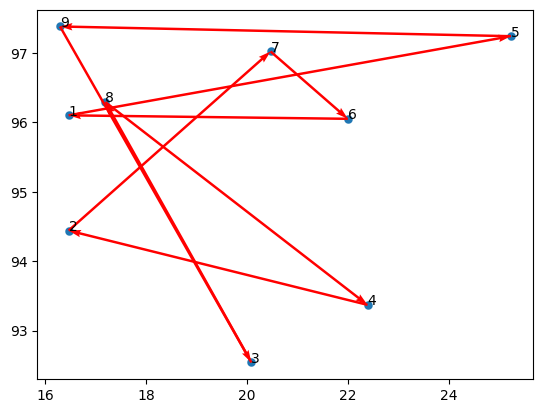

초기 염색체의 경로: 52.71933705566138
30단계 이후의 최단 경로: 24.302849592451
30단계 이후의 최적 경로:
1-->9-->8-->7-->6-->5-->4-->3-->2-->1

60단계 이후의 최단 경로: 24.302849592451
60단계 이후의 최적 경로:
9-->1-->2-->3-->4-->5-->6-->7-->8-->9

90단계 이후의 최단 경로: 24.302849592450997
90단계 이후의 최적 경로:
5-->4-->3-->2-->1-->9-->8-->7-->6-->5

120단계 이후의 최단 경로: 24.302849592450997
120단계 이후의 최적 경로:
5-->4-->3-->2-->1-->9-->8-->7-->6-->5

150단계 이후의 최단 경로: 24.302849592450997
150단계 이후의 최적 경로:
5-->4-->3-->2-->1-->9-->8-->7-->6-->5

180단계 이후의 최단 경로: 24.302849592450997
180단계 이후의 최적 경로:
5-->4-->3-->2-->1-->9-->8-->7-->6-->5



In [75]:
# 9개 도시의 좌표를 다음과 같이 설정함
data = np.array([16.47,96.10,16.47,94.44,20.09,92.54,
    22.39,93.37,25.23,97.24,22.00,96.05,20.47,97.02,
    17.20,96.29,16.30,97.38]).reshape(9,2)

main(data)

# 3. OR-Tools 패키지를 통해 9개 도시가 포함된 TSP 문제를 해결하기
> - OR-Tools는 다양한 실제 최적화 문제를 해결하기 위해 효율적이고 확장 가능하며 사용하기 쉬운 도구를 제공하는 것을 목표로 Google에서 개발한 오픈 소스 수학 최적화 도구 키트이다. 
> - OR-Tools는 정수 프로그래밍, 선형 프로그래밍, 제약 프로그래밍, 흐름 문제 등과 같은 다양한 최적화 알고리즘을 지원하고 Python 인터페이스를 제공한다.
> - OR-Tools는 솔버로 TSP를 비롯한 다양한 문제의 해결을 지원한다.

In [77]:
# Import libraries
from ortools.constraint_solver import routing_enums_pb2
from ortools.constraint_solver import pywrapcp

# Create the data model
def create_data_model():
    """Stores the data for the problem."""
    data = {}
    # Distance matrix between cities
    data['distance_matrix'] = [
        [0, 2451, 713, 1018, 1631, 1374, 2408, 213, 2571, 875, 1420, 2145, 1972],
        [2451, 0, 1745, 1524, 831, 1240, 959, 2596, 403, 1589, 1374, 357, 579],
        [713, 1745, 0, 355, 920, 803, 1737, 851, 1858, 262, 940, 1453, 1260],
        [1018, 1524, 355, 0, 700, 862, 1395, 1123, 1584, 466, 1056, 1280, 987],
        [1631, 831, 920, 700, 0, 663, 1021, 1769, 949, 796, 879, 586, 371],
        [1374, 1240, 803, 862, 663, 0, 1681, 1551, 1765, 547, 225, 887, 999],
        [2408, 959, 1737, 1395, 1021, 1681, 0, 2493, 678, 1724, 1891, 1114, 701],
        [213, 2596, 851, 1123, 1769, 1551, 2493, 0, 2699, 1038, 1605, 2300, 2099],
        [2571, 403, 1858, 1584, 949, 1765, 678, 2699, 0, 1744, 1645, 653, 600]
        ]
    '''[875, 1589, 262, 466, 796, 547, 1724, 1038, 1744, 0, 679, 1272, 1162],
        [1420, 1374, 940, 1056, 879, 225, 1891, 1605, 1645, 679, 0, 1017, 1200],
        [2145, 357, 1453, 1280, 586, 887, 1114, 2300, 653, 1272, 1017, 0, 504],
        [1972, 579, 1260, 987, 371, 999, 701, 2099, 600, 1162, 1200, 504, 0],'''
    # Number of cities
    data['num_vehicles'] = 1
    # Start city index
    data['depot'] = 0
    return data


# Print the result
def print_solution(manager, routing, solution):
    print('The optimal solution found is: {} '.format(solution.ObjectiveValue()))
    index = routing.Start(0)
    plan_output = 'The route of the vehicle 0 is:\n'
    route_distance = 0
    while not routing.IsEnd(index):
        plan_output += ' {} ->'.format(manager.IndexToNode(index))
        previous_index = index
        index = solution.Value(routing.NextVar(index))
        route_distance += routing.GetArcCostForVehicle(previous_index, index, 0)
    plan_output += ' {}\n'.format(manager.IndexToNode(index))
    print(plan_output)
    plan_output += 'The length of the journey is: {} \n'.format(route_distance)
    
    
# Create the routing index manager and model
def main():
    """Solve the TSP problem."""
    # Instantiate the data problem.
    data = create_data_model()

    # Create the routing index manager.
    manager = pywrapcp.RoutingIndexManager(len(data['distance_matrix']),
                                       data['num_vehicles'], data['depot'])

    # Create Routing Model.
    routing = pywrapcp.RoutingModel(manager)


    # Define cost of each arc.
    def distance_callback(from_index, to_index):
        """Returns the distance between the two nodes."""
        # Convert from routing variable Index to distance matrix NodeIndex.
        from_node = manager.IndexToNode(from_index)
        to_node = manager.IndexToNode(to_index)
        return data['distance_matrix'][from_node][to_node]

    transit_callback_index = routing.RegisterTransitCallback(distance_callback)

    # Define cost of each arc.
    routing.SetArcCostEvaluatorOfAllVehicles(transit_callback_index)

    # Setting first solution heuristic.
    search_parameters = pywrapcp.DefaultRoutingSearchParameters()
    search_parameters.first_solution_strategy = (
     routing_enums_pb2.FirstSolutionStrategy.PATH_CHEAPEST_ARC)

    # Solve the problem.
    solution = routing.SolveWithParameters(search_parameters)

    # Print solution on console.
    if solution:
        print_solution(manager, routing, solution)


if __name__ == '__main__':
    main()

The optimal solution found is: 6763 
The route of the vehicle 0 is:
 0 -> 7 -> 2 -> 3 -> 6 -> 8 -> 1 -> 4 -> 5 -> 0

